# twitter数据集整理与分析
## 收集

In [1]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# twitter帖子数据
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# df_image_predictions 预测品种数据
url_image_predictions = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url_image_predictions)
with open('image_predictions.tsv','wb') as f:
    f.write(r.content)

In [4]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# 点赞和转发数据
url_tweet_json = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt'
r = requests.get(url_tweet_json)
with open('tweet_json.txt', 'wb') as f:
    f.write(r.content)

In [6]:
df_tweet_json = pd.DataFrame(columns=['id','retweet_count','favorite_count'])
with open('tweet_json.txt') as f:
    for i in f:
        d = json.loads(i)
        df = pd.DataFrame([{'id': d['id'],
                            'retweet_count' : d['retweet_count'],
                            'favorite_count': d['favorite_count']}])
        df_tweet_json = pd.concat([df_tweet_json, df], ignore_index=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## 评估
### 目测评估

In [7]:
# 目测评估三个数据集
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1923,674082852460433408,NaN,NaN,2015-12-08 04:27:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sagitariot Baklava mix. Loves her ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674082852...,11,10,a,None,None,None,None
1572,687664829264453632,NaN,NaN,2016-01-14 15:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Opal. He's a Belgian Dijon Poofster. Upse...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687664829...,11,10,Opal,None,None,None,None
597,798694562394996736,NaN,NaN,2016-11-16 01:09:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what's happening h...,7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None
1191,717841801130979328,NaN,NaN,2016-04-06 22:29:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717841801...,11,10,Barclay,None,None,None,None
2108,670452855871037440,NaN,NaN,2015-11-28 04:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog can't see its haters. 11/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670452855...,11,10,None,None,None,None,None


In [8]:
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1522,788070120937619456,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
189,669375718304980992,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,1,Airedale,0.168762,True,Norfolk_terrier,0.107479,True,Lakeland_terrier,0.097846,True
1741,822610361945911296,https://pbs.twimg.com/media/C2p_wQyXEAELtvS.jpg,1,cocker_spaniel,0.664487,True,Norfolk_terrier,0.075089,True,Norwich_terrier,0.059644,True
819,692905862751522816,https://pbs.twimg.com/media/CZ2yNKhWEAA_7cb.jpg,1,Mexican_hairless,0.162638,True,Doberman,0.156287,True,Rhodesian_ridgeback,0.081478,True
412,673919437611909120,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,1,jack-o'-lantern,0.172079,False,schipperke,0.115984,True,miniature_pinscher,0.052175,True


In [9]:
df_tweet_json.sample(5)

,favorite_count,id,retweet_count
362,58067,829011960981237760,18527
656,14627,791406955684368384,4774
1642,2865,683834909291606017,1256
1053,5624,742150209887731712,1771
1318,1850,706291001778950144,521


### 编程评估

In [10]:
# 使用 pandas 的各种方法评估三个数据集，比如 info value_counts 等
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
favorite_count    2352 non-null object
id                2352 non-null object
retweet_count     2352 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [13]:
# tweet_id是883482846933004288的记录，text中rating_numerator是13.5，记录中是5
df_twitter_archive[df_twitter_archive['tweet_id'] == 883482846933004288].loc[:,['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
45,883482846933004288,5,10


In [14]:
# tweet_id是883482846933004288的记录，text中rating_numerator是13.5，记录中是5
df_twitter_archive[df_twitter_archive['tweet_id'] == 883482846933004288]['text'].iloc[0]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [15]:
# tweet_id是890240255349198849的帖子，stage是pupper，数据记录的是doggo
df_twitter_archive[df_twitter_archive['tweet_id'] == 890240255349198849].loc[:,['tweet_id','doggo','floofer','pupper','puppo']]

,tweet_id,doggo,floofer,pupper,puppo
9,890240255349198849,doggo,None,None,None


In [16]:
# tweet_id是890240255349198849的帖子，stage是pupper，数据记录的是doggo
df_twitter_archive[df_twitter_archive['tweet_id'] == 890240255349198849]['text'].iloc[0]

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A'

In [17]:
# name 有不正确的
df_twitter_archive['name'].value_counts().index.sort_values()[-30:]

Index(['Ziva', 'Zoe', 'Zoey', 'Zooey', 'Zuzu', 'a', 'actually', 'all', 'an',
       'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life',
       'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite',
       'space', 'such', 'the', 'this', 'unacceptable', 'very'],
      dtype='object')

#### 质量
##### `df_twitter_archive` 表格
- 转发的的数据需要删除(项目要求数据只使用有图片的原始tweets)
- 没有图片的数据需要删除(项目要求数据只使用有图片的原始tweets)
- tweet_id是883482846933004288的记录，text中rating_numerator是13.5，记录中是5
- tweet_id是890240255349198849的记录，stage是pup，数据记录的是doggo
- 表格数据读取问题：in_reply_to_status_id，in_reply_to_user_id应该是int，timestamp应该是datetime

##### `df_image_predictions` 表格
- 无

##### `df_tweet_json` 表格
- 表格数据读取问题：favorite_count，retweet_count，id应该是int类型

#### 整洁问题
- 三个表都是关于评分的，应该合并成一个表格
- `df_twitter_archive`表doggo，floofer，pupper，puppo都是stage，应该属于一列



## 清理

In [18]:
# 备份三个数据集
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy()

#### 质量问题
##### `df_twitter_archive` 表格
- 转发的的数据需要删除<font color=#0099ff>(项目要求数据只使用有图片的原始tweets)</font>

##### 定义
`df_image_predictions`中的帖子都有图片，使用inner join 合并tweet_id相同的记录

##### 代码

In [19]:
# 合并df_image_predictions_clean和df_twitter_archive_clean，保留两者都有的tweet_id
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, on='tweet_id', how='inner')

##### 测试

In [20]:
# df_twitter_archive_clean中所有的的tweet_id都在df_image_predictions_clean中
(~df_twitter_archive_clean['tweet_id'].isin(df_image_predictions_clean['tweet_id'])).sum()

0

#### 质量问题
##### `df_twitter_archive` 表格
- 转发的的数据需要删除<font color=#0099ff>(项目要求数据只使用有图片的原始tweets)</font>

##### 定义
- `df_twitter_archive`的text列中开头包含'RT @'的记录是转发，删除这些记录
- 此处执行完成后，就已经将`df_image_predictions`表合并到`df_twitter_archive`了

##### 代码

In [21]:
# 使用正则匹配开头是RT @的行，删除这些行
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['text'].apply(lambda x:False if re.match(r'^RT @', x) else True)]

##### 测试

In [22]:
(~df_twitter_archive_clean['retweeted_status_id'].isnull()).sum()

0

In [23]:
df_twitter_archive_clean[df_twitter_archive_clean['tweet_id'] == 883482846933004288]['rating_denominator']

41    10
Name: rating_denominator, dtype: int64

#### 质量问题
##### `df_twitter_archive_clean` 表格
- tweet_id是883482846933004288的记录，text中rating_numerator是13.5，记录中是5

##### 定义
- 为了准确，rating_numerator，rating_denominator在text中提取，删除原来的rating_numerator，rating_denominator

##### 代码

In [24]:
# 从text中提取分子和分母保存到新列，删除原来的分子分布列
rating = df_twitter_archive_clean['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
rating['rating_numerator'] = rating['rating_numerator'].astype(float)
rating['rating_denominator'] = rating['rating_denominator'].astype(float)
df_twitter_archive_clean = df_twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1)
df_twitter_archive_clean = pd.concat([df_twitter_archive_clean, rating], axis=1)

##### 测试

In [25]:
df_twitter_archive_clean[df_twitter_archive_clean['tweet_id'] == 883482846933004288].loc[:,['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
41,883482846933004288,13.5,10.0


#### 质量问题
##### `df_twitter_archive_clean` 表格
- tweet_id是890240255349198849的记录，stage是pup，数据记录的是doggo

##### 定义
- tweet_id是890240255349198849的记录，stage改成pupper和puppo

##### 代码

In [26]:
df_twitter_archive_clean.loc[9,'doggo'] = 'None'
df_twitter_archive_clean.loc[9,'pupper'] = 'pupper'
df_twitter_archive_clean.loc[9,'puppo'] = 'puppo'

##### 测试

In [27]:
df_twitter_archive_clean[df_twitter_archive_clean['tweet_id'] == 890240255349198849].loc[:,['tweet_id','floofer','doggo','pupper','puppo']]

,tweet_id,floofer,doggo,pupper,puppo
9,890240255349198849,None,None,pupper,puppo


#### 质量问题
##### `df_twitter_archive_clean` 表格
- 表格数据读取问题：in_reply_to_status_id，in_reply_to_user_id应该是int64，timestamp应该是datetime

##### 定义
- in_reply_to_status_id，in_reply_to_user_id中的NaN填充为0，类型改为int，timestamp改为datetime

##### 代码

In [28]:
df_twitter_archive_clean['in_reply_to_status_id'] = df_twitter_archive_clean['in_reply_to_status_id'].fillna(0).astype(int)
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])

##### 测试

In [29]:
print(df_twitter_archive_clean['timestamp'].dtype)
print(df_twitter_archive_clean['in_reply_to_status_id'].dtype)

datetime64[ns]
int64


#### 质量问题
##### `df_twitter_archive_clean` 表格
- name有些小写的值不正确和帖子内容不符

##### 定义
- 将不正确的name改为not_provided

##### 代码

In [30]:
# 将name为小写的记录改为not_provided
df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].apply(lambda x:x if x.istitle() else 'not_provide')

##### 测试

In [31]:
df_twitter_archive_clean['name'].value_counts().index.sort_values()[-10:]

Index(['Zara', 'Zeek', 'Zeke', 'Zeus', 'Ziva', 'Zoe', 'Zoey', 'Zooey', 'Zuzu',
       'not_provide'],
      dtype='object')

#### 质量问题
##### `df_tweet_json` 表格
- 表格数据读取问题：favorite_count，retweet_count，id应该是int类型

##### 定义
- 将favorite_count，retweet_count，id改为int类型

##### 代码


In [32]:
df_tweet_json_clean['id'] = df_tweet_json['id'].astype('int')
df_tweet_json_clean['favorite_count'] = df_tweet_json['favorite_count'].astype('int')
df_tweet_json_clean['retweet_count'] = df_tweet_json['retweet_count'].astype('int')

##### 测试

In [33]:
print(df_tweet_json_clean['favorite_count'].dtype)
print(df_tweet_json_clean['id'].dtype)
print(df_tweet_json_clean['retweet_count'].dtype)

int64
int64
int64


#### 整洁问题
##### `df_tweet_json` 表格
- 三个表都是关于评分的，应该合并成一个表格

##### 定义
- 前面已经将`df_image_predictions`表合并到`df_twitter_archive`表了
- 用merge将`df_tweet_json`表合并到`df_twitter_archive`
- 删除合并后`df_twitter_archive`表的id列

##### 代码

In [34]:
# 将df_tweet_json合并到df_twitter_archive
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweet_json_clean, left_on='tweet_id', right_on='id', how='left')
df_twitter_archive_clean.drop('id', axis=1, inplace=True)

##### 测试

In [35]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                           

#### 整洁问题
##### `df_tweet_json` 表格
- `df_twitter_archive`表doggo，floofer，pupper，puppo应该属于一列

##### 定义
- 新建dog_stage，用来存储doggo，floofer，pupper，puppo
- 删除原来doggo，floofer，pupper，puppo列
- 有多个stage的记录用逗号隔开，没有用not_provided

##### 代码

In [36]:
# 有多个stage的记录用逗号隔开，没有用not_provided
tmp = df_twitter_archive_clean
tmp = pd.melt(tmp, id_vars=['tweet_id'], value_vars=['doggo','floofer','pupper','puppo'], var_name='myvar_name', value_name='dog_stage')
tmp = tmp.groupby('tweet_id')['dog_stage'].sum().str.findall(r'(doggo|floof|pupper|puppo)').apply(lambda x: ','.join(x) if x else 'not_provided')
tmp = pd.DataFrame(tmp)
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, tmp, on='tweet_id')
df_twitter_archive_clean = df_twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

##### 测试

In [37]:
df_twitter_archive_clean['dog_stage'].value_counts()

not_provided    1688
pupper           203
doggo             62
puppo             22
doggo,pupper       9
floof              7
doggo,puppo        1
pupper,puppo       1
doggo,floof        1
Name: dog_stage, dtype: int64

## 重新评估

In [38]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
name                          1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                        1994 non-null bool
p2                            1994 non-null object
p2_conf                       

In [39]:
# 有多个dog_stage的记录
df_twitter_archive_clean[df_twitter_archive_clean['dog_stage'].str.contains(',')][['tweet_id','dog_stage']]

,tweet_id,dog_stage
9,890240255349198849,"pupper,puppo"
148,855851453814013952,"doggo,puppo"
154,854010172552949760,"doggo,floof"
340,817777686764523521,"doggo,pupper"
397,808106460588765185,"doggo,pupper"
419,802265048156610565,"doggo,pupper"
425,801115127852503040,"doggo,pupper"
510,785639753186217984,"doggo,pupper"
652,759793422261743616,"doggo,pupper"
704,751583847268179968,"doggo,pupper"


In [40]:
# tweet_id是751583847268179968的帖子，dog_stage是doggo,pupper，text中没有提供dog_stage
df_twitter_archive[df_twitter_archive['tweet_id'] == 751583847268179968]['text'].iloc[0]

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

#### 质量
##### `df_twitter_archive` 表格
- tweet_id为751583847268179968的记录dog_stage应该是not_provided
- retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列无数据
- 合并后的`df_twitter_archive`表存在多个预测数据

#### 整洁问题
- 无


## 清理

#### 质量问题
##### `df_twitter_archive` 表格
- tweet_id为751583847268179968的记录dog_stage应该是not_provided

##### 定义
- 将tweet_id为751583847268179968的记录(索引号704)dog_stage改为not_provided

##### 代码

In [41]:
# 索引为704的记录dog_stage改为not_provided
df_twitter_archive_clean.loc[704,'dog_stage'] = 'not_provided'

##### 测试

In [42]:
# 查看twteed_id为751583847268179968记录的dog_stage
df_twitter_archive_clean[df_twitter_archive_clean['tweet_id'] == 751583847268179968]['dog_stage']

704    not_provided
Name: dog_stage, dtype: object

#### 质量问题
##### `df_twitter_archive` 表格
- in_reply_to_status_id，in_reply_to_user_id，timestamp列无数据
- 合并后的df_twitter_archive表存在多个预测数据，

##### 定义
- 删除in_reply_to_status_id，in_reply_to_user_id，timestamp列
- 删除p2，p2_conf，p2_dog，p3，p3_conf，p3_dog列

##### 代码

In [43]:
# 删除df_twitter_archive中没用的列
df_twitter_archive_clean = df_twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)
df_twitter_archive_clean = df_twitter_archive_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

##### 测试

In [44]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 18 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
dog_stage                1994 non-null object
dtypes: bool(1), datetime64[ns](1), float64(4), int64(5), obje

### 存储清理后的主数据集

In [45]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## 分析和可视化

#### 评分最高的狗名字是什么？

In [46]:
# 还是 Atticus
df_twitter_archive_clean['score'] = df_twitter_archive_clean['rating_numerator'] / df_twitter_archive_clean['rating_denominator']
highest_score_name = df_twitter_archive_clean[df_twitter_archive_clean['score'] == df_twitter_archive_clean['score'].max()]['name']
highest_score_name

726    Atticus
Name: name, dtype: object

#### @dog_rates的帖子转发量如何？

In [47]:
df_twitter_archive_clean['retweet_count'].describe()

count     1994.000000
mean      2770.021063
std       4715.961325
min         15.000000
25%        622.250000
50%       1348.500000
75%       3202.750000
max      79116.000000
Name: retweet_count, dtype: float64

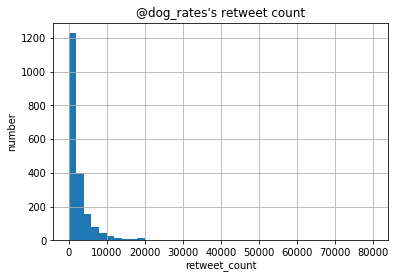

In [48]:
# 大多数帖子转发量在0-2000
bin_edges = np.arange(0, df_twitter_archive_clean['retweet_count'].max()+2000, 2000)
df_twitter_archive_clean['retweet_count'].hist(bins=bin_edges);
plt.ylabel('number')
plt.xlabel('retweet_count')
plt.title("@dog_rates's retweet count");

#### 点赞量和转发量是否有关系？

相关系数： [[ 1.          0.91502202]
 [ 0.91502202  1.        ]]


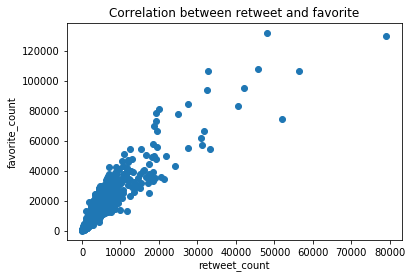

In [49]:
# 相关系数是0.91312546 强正相关
print("相关系数：",np.corrcoef(df_twitter_archive_clean['retweet_count'], df_twitter_archive_clean['favorite_count']))
plt.scatter(x = df_twitter_archive_clean['retweet_count'], y = df_twitter_archive_clean['favorite_count'])
plt.ylabel('favorite_count')
plt.xlabel('retweet_count')
plt.title('Correlation between retweet and favorite');